In [18]:
import os
import numpy as np
import pandas as pd
dataframe = pd.read_csv( '/home/yupaporn/codes/USAI/FVtrain_AN_RF_AN_fold5_3.csv') #เปลี่ยนไฟล์
dataframe = dataframe.drop(['Unnamed: 0'], axis=1)
dataframe

,0,1,2,3,4,5,6,7,8,9,...,2042,2043,2044,2045,2046,2047,Class,SubPosition,Views,Sub_class
0,0.003436,-0.006957,0.438242,0.372111,-0.199880,-0.188218,0.114756,-0.088675,-0.129549,0.342350,...,0.124574,-0.059697,0.010295,-0.044000,0.095533,-0.084560,Abnormal,P1,FP-A,AB01
1,-0.205446,-0.112054,0.259600,0.194493,-0.199839,-0.216237,0.025921,-0.242225,-0.219547,0.200189,...,0.128339,-0.172855,0.019437,-0.103775,0.179028,-0.151626,Abnormal,P1,FP-A,AB02
2,-0.191589,-0.133242,-0.074524,0.286159,-0.219189,-0.208353,-0.066215,-0.206325,-0.232457,0.132560,...,0.015449,-0.163153,-0.122684,-0.132702,0.164599,-0.175658,Abnormal,P1,FP-A,AB03
3,-0.197990,-0.165931,-0.077049,0.156092,-0.228565,-0.170821,0.276309,-0.193761,-0.217866,0.071288,...,0.334201,0.424394,0.250562,-0.129114,0.517108,-0.184587,Abnormal,P1,FP-A,AB04
4,-0.192434,-0.172683,0.156598,0.275882,-0.238268,-0.219216,0.109179,-0.215106,-0.219822,0.103041,...,0.009403,0.327512,-0.054406,-0.125430,0.207978,-0.163738,Abnormal,P1,FP-A,AB05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7387,0.107575,0.321336,-0.143425,-0.181942,0.468015,0.367909,-0.167594,0.572682,0.382705,-0.231091,...,-0.232008,-0.125020,-0.208301,0.361636,-0.178785,0.127030,Normal,P8,FP-E,Normal
7388,-0.032493,0.301678,-0.175659,-0.134148,0.845544,0.442283,-0.187157,0.361753,0.766719,-0.215630,...,-0.211222,-0.201417,-0.192275,0.798369,-0.188651,0.777100,Normal,P8,FP-E,Normal
7389,0.811460,0.416148,-0.124775,0.131052,0.786615,0.762583,-0.133049,0.390502,0.537864,-0.205135,...,-0.191684,-0.147980,-0.201260,1.163818,-0.152636,0.953861,Normal,P8,FP-E,Normal
7390,-0.032493,0.301678,-0.175659,-0.134148,0.845544,0.442283,-0.187157,0.361753,0.766719,-0.215630,...,-0.211222,-0.201417,-0.192275,0.798369,-0.188651,0.777100,Normal,P8,FP-E,Normal


In [19]:
X = dataframe.iloc[:,0:2048]
y = dataframe.iloc[:,2050]
print(X.shape)
print(y.shape)

(7392, 2048)
(7392,)


In [20]:
y[0]

'FP-A'

# Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier

In [22]:
n_estimators = [400]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100] 

forest = RandomForestClassifier(random_state = 1)


hyperF ={'n_estimators' : n_estimators, 'max_depth' : max_depth, 'min_samples_split' : min_samples_split}
# hyperF ={'max_depth' : max_depth, 'min_samples_split' : min_samples_split}

gridF = GridSearchCV(forest, hyperF, cv = 10, verbose = 1, n_jobs = -1)
bestF = gridF.fit(X, y)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


In [23]:
# view the results as a pandas DataFrame
import pandas as pd
pd.DataFrame(bestF.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.543706,0.108377,"{'max_depth': 5, 'min_samples_split': 2, 'n_es..."
1,0.544652,0.107093,"{'max_depth': 5, 'min_samples_split': 5, 'n_es..."
2,0.542623,0.105637,"{'max_depth': 5, 'min_samples_split': 10, 'n_e..."
3,0.541540,0.106997,"{'max_depth': 5, 'min_samples_split': 15, 'n_e..."
4,0.526117,0.108336,"{'max_depth': 5, 'min_samples_split': 100, 'n_..."
5,0.716877,0.123238,"{'max_depth': 8, 'min_samples_split': 2, 'n_es..."
6,0.709572,0.122504,"{'max_depth': 8, 'min_samples_split': 5, 'n_es..."
7,0.703347,0.119784,"{'max_depth': 8, 'min_samples_split': 10, 'n_e..."
8,0.700642,0.120950,"{'max_depth': 8, 'min_samples_split': 15, 'n_e..."
9,0.622578,0.120857,"{'max_depth': 8, 'min_samples_split': 100, 'n_..."


In [24]:
# examine the first result
print("**examine the first result","\n")

print(bestF.cv_results_['params'][0])
print(bestF.cv_results_['mean_test_score'][0])

# print the array of mean scores only
print("\n","**print the array of mean scores only","\n")

grid_mean_scores = bestF.cv_results_['mean_test_score']
print(grid_mean_scores)

# examine the best model
print("\n","**examine the best model","\n")

print(bestF.best_score_)
print(bestF.best_params_)
print(bestF.best_estimator_)

**examine the first result 

{'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 400}
0.5437058845042608

 **print the array of mean scores only 

[0.54370588 0.54465201 0.54262316 0.54154025 0.52611656 0.71687653
 0.7095721  0.70334693 0.70064203 0.62257836 0.81238379 0.80954614
 0.80995227 0.80819241 0.69238891 0.81441429 0.81617324 0.81360348
 0.8137399  0.70226365 0.81387265 0.8148197  0.81373843 0.81333211
 0.70456406]

 **examine the best model 

0.8161732436089677
{'max_depth': 25, 'min_samples_split': 5, 'n_estimators': 400}
RandomForestClassifier(max_depth=25, min_samples_split=5, n_estimators=400,
                       random_state=1)


In [25]:
#Print the tured parameters and score
print("Tuned Decision Tree Parameters: {}".format(bestF.best_params_))
print("Best score is {}".format(bestF.best_score_))

Tuned Decision Tree Parameters: {'max_depth': 25, 'min_samples_split': 5, 'n_estimators': 400}
Best score is 0.8161732436089677


# setting parameters

In [26]:
forestOpt = RandomForestClassifier(random_state = 1, max_depth = 25, n_estimators = 400, min_samples_split = 5) #เปลี่ยนตาม cell 8
             
modelOpt = forestOpt.fit(X, y)# 

In [27]:
dataframe = pd.read_csv( '/home/yupaporn/codes/USAI/FVvalidation_AN_RF_AN_fold5_3.csv') #เปลี่ยนชื่อไฟล์ Validation

In [28]:
dataframe

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,2042,2043,2044,2045,2046,2047,Class,SubPosition,Views,Sub_class
0,0,-0.161462,-0.152879,0.256679,0.241182,-0.078173,-0.209299,0.082906,-0.065024,-0.192670,...,0.485726,0.187939,-0.080824,-0.115393,0.331072,-0.066109,Abnormal,P1,FP-A,AB02
1,1,-0.157732,-0.111913,-0.023882,-0.010294,-0.142242,-0.150712,0.044189,-0.191502,-0.186124,...,0.043757,-0.079727,-0.107907,-0.113182,0.045485,-0.036134,Abnormal,P1,FP-A,AB04
2,2,-0.092086,-0.161458,0.273810,0.065689,-0.187819,-0.129029,0.325005,-0.035329,-0.153607,...,-0.189625,0.126085,0.030574,-0.166424,-0.000663,-0.169925,Abnormal,P1,FP-A,AB06
3,3,-0.157194,-0.036058,0.281343,0.311602,-0.135455,-0.194458,-0.019710,-0.203548,-0.206358,...,0.136393,-0.169705,0.040502,-0.118054,0.005307,-0.173788,Abnormal,P1,FP-A,AB01
4,4,-0.188709,-0.120326,-0.017873,0.114815,-0.201125,-0.183448,-0.114184,-0.243925,-0.237956,...,-0.025531,-0.209630,-0.183905,-0.106037,0.066563,-0.115863,Abnormal,P1,FP-A,AB02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,1027,0.162884,0.709492,0.041260,-0.124735,0.591559,0.463998,-0.130290,0.825691,0.411431,...,-0.187519,-0.128364,-0.184006,0.721855,-0.145705,0.730683,Normal,P8,FP-E,Normal
1028,1028,0.480005,0.040190,-0.191937,-0.107381,0.524708,0.782509,-0.162980,0.120784,0.329766,...,-0.083386,-0.162289,-0.214240,0.068062,-0.180618,0.156169,Normal,P8,FP-E,Normal
1029,1029,1.002283,0.494473,-0.165996,0.009442,0.815505,0.847086,-0.192301,0.341254,0.584969,...,-0.083126,-0.174109,-0.194701,0.633130,-0.151081,0.643420,Normal,P8,FP-E,Normal
1030,1030,0.975566,0.295354,-0.166905,-0.074399,0.679387,0.862345,-0.167598,0.209737,0.467506,...,-0.098446,-0.166756,-0.195376,0.692216,-0.128729,0.567934,Normal,P8,FP-E,Normal


In [29]:
X_test = dataframe.iloc[:,1:2049]
y_test = dataframe.iloc[:,2051]
print(X_test.shape)
print(y_test.shape)

(1032, 2048)
(1032,)


In [30]:
y_test

0       FP-A
1       FP-A
2       FP-A
3       FP-A
4       FP-A
        ... 
1027    FP-E
1028    FP-E
1029    FP-E
1030    FP-E
1031    FP-E
Name: Views, Length: 1032, dtype: object

In [31]:
y_pred = modelOpt.predict(X_test)

In [32]:
#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))#performance

[[ 51  49  76   0   1]
 [ 16 224  40   7   9]
 [ 10  46 280   8   0]
 [  1  16  62  93   0]
 [  1   3   0   2  37]]
              precision    recall  f1-score   support

        FP-A       0.65      0.29      0.40       177
        FP-B       0.66      0.76      0.71       296
        FP-C       0.61      0.81      0.70       344
        FP-D       0.85      0.54      0.66       172
        FP-E       0.79      0.86      0.82        43

    accuracy                           0.66      1032
   macro avg       0.71      0.65      0.66      1032
weighted avg       0.68      0.66      0.65      1032



Text(0.5, 21.5, 'Predicted label')

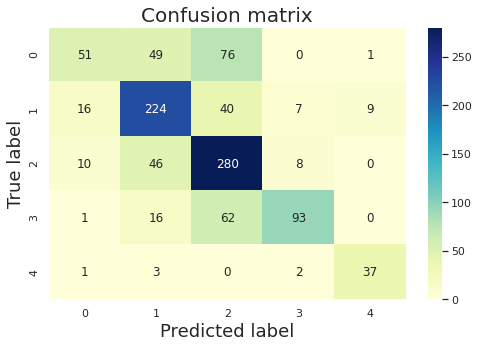

In [33]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

# Save Model

In [34]:
#Save Model

import pickle
os.chdir('/media/tohn/SSD/ModelTrainByImages/R2_5/models/')
filename = "modelrf_AN_5FP_fold5_3.pkl" #เปลี่ยนชื่อไฟล์ Train random forest
with open(filename, 'wb') as file:
    pickle.dump(modelOpt, file)

In [ ]:
# #load model

# with open(filename, 'rb') as file:
#     model = pickle.load(file)